# Исследование покупательского поведения и прогнозирование продаж в онлайн-ритейле
**Автор**: Лебедев Н.Г.

**Группа**: ИД22-1

---

## **Цель проекта:**
Разработка прогностической модели, способной предсказывать ежедневную выручку компании на основе исторических данных и созданных признаков, с учётом ключевых факторов, таких как временные и клиентские особенности.

---

## **Задачи проекта:**

1. **Подготовка данных:**  
   - Загрузить и обработать исторические данные о продажах.  
   - Устранить пропуски, некорректные и выбросные значения.  
   - Привести данные к формату, пригодному для последующего анализа и построения модели.


2. **Агрегация данных и создание признаков:**  
   - Сгруппировать данные на уровне дня.  
   - Создать временные признаки для удобства работы с датасетом. 


3. **Анализ данных:**  
   - Провести исследовательский анализ данных (EDA), включая визуализацию ключевых параметров (дни недели, активность клиентов, ценовые категории и сезонность).  
   - Выявить факторы, которые оказывают наибольшее влияние на выручку.
   - Создать ключевые признаки, учитывающие сезонность, активность клиентов, дни недели, ценовые категории и другие важные аспекты.


4. **Прогнозирование выручки компании:**  
   - Преобразовать целевую переменную (`TotalPrice`) для повышения стабильности данных.
   - Построить и обучить несколько моделей машинного обучения (линейная регрессия, случайный лес, градиентный бустинг).  
   - Провести оценку точности моделей с использованием метрик MAE и RMSE.  
   - Сравнить результаты моделей.  
   - Построить графики сравнения фактических и прогнозируемых значений для каждой модели, чтобы наглядно оценить их производительность.


5. **Прогноз на будущие периоды:**  
   - Выполнить прогноз выручки на следующие 10 дней с использованием обученной модели.  
   - Визуализировать результаты прогноза и сделать выводы о точности.

---

## Датасет
- **Online Retail II**: включает данные о транзакциях, такие как дата, товар, количество, стоимость и страна покупателя.

- Название датасета: [Online Retail II]. 

- Основные переменные: `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `Price`, `CustomerID`. 

- Источник данных: [Kaggle](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci).  

## 1. Подготовка данных

### 1.1 Импорт библиотек

Загрузка необходимых библиотек для анализа, визуализации и машинного обучения.

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 1.2 Загрузка и первичный анализ данных

Загрузка данных, обзор структуры (info, head), поиск пропусков.

In [3]:
# Загрузка датасета
file_path = "online_retail_II.csv"
df = pd.read_csv(file_path)

In [4]:
# Описание датасета 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
# Поиск пропусков
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
# Вывод первых 5 строчек датасета
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

### 1.3 Очистка данных
1. Удаление пропусков в `Customer ID`.

In [7]:
# Удаление пропусков
df.dropna(subset=['Customer ID'], inplace=True)

In [8]:
df.isnull().sum() # Наблюдаем, что пропущенных значений больше не осталось

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

2. Преобразование даты в формат `datetime`.

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df.dtypes # Наблюдаем, что преобразование прошло успешно

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

3. Удаление отрицательных значений.

In [11]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [12]:
(df.select_dtypes(include='number') < 0).sum() # Отрицательных значений не осталось

Quantity       0
Price          0
Customer ID    0
dtype: int64

4. Создание признака `TotalPrice` (объем продаж).

In [13]:
# Добавление нового признака
df['TotalPrice'] = df['Quantity'] * df['Price']

In [14]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0

## 2. Агрегация данных и создание признаков

### 2.1 Агрегация данных по дням

Агрегация продаж (`TotalPrice`) по дням:

In [15]:
sales_per_day = df.resample('D', on='InvoiceDate')['TotalPrice'].sum().reset_index()

In [16]:
sales_per_day # Получаем значение суммы продаж по каждому дню

InvoiceDate  TotalPrice
0    2009-12-01    44048.69
1    2009-12-02    52941.99
2    2009-12-03    67479.08
3    2009-12-04    34064.41
4    2009-12-05     9803.05
..          ...         ...
734  2011-12-05    58202.21
735  2011-12-06    46144.04
736  2011-12-07    69354.21
737  2011-12-08    50519.41
738  2011-12-09   184367.28

[739 rows x 2 columns]

### 2.2 Создание временных признаков
Извлечение дня, месяца, года для более удобной работы:

In [17]:
sales_per_day['Day'] = sales_per_day['InvoiceDate'].dt.day
sales_per_day['Month'] = sales_per_day['InvoiceDate'].dt.month
sales_per_day['Year'] = sales_per_day['InvoiceDate'].dt.year

sales_per_day

InvoiceDate  TotalPrice  Day  Month  Year
0    2009-12-01    44048.69    1     12  2009
1    2009-12-02    52941.99    2     12  2009
2    2009-12-03    67479.08    3     12  2009
3    2009-12-04    34064.41    4     12  2009
4    2009-12-05     9803.05    5     12  2009
..          ...         ...  ...    ...   ...
734  2011-12-05    58202.21    5     12  2011
735  2011-12-06    46144.04    6     12  2011
736  2011-12-07    69354.21    7     12  2011
737  2011-12-08    50519.41    8     12  2011
738  2011-12-09   184367.28    9     12  2011

[739 rows x 5 columns]

In [18]:
sales_per_day[['InvoiceDate', 'Year', 'Month', 'Day']] # Успешно добавлено в датафрейм

InvoiceDate  Year  Month  Day
0    2009-12-01  2009     12    1
1    2009-12-02  2009     12    2
2    2009-12-03  2009     12    3
3    2009-12-04  2009     12    4
4    2009-12-05  2009     12    5
..          ...   ...    ...  ...
734  2011-12-05  2011     12    5
735  2011-12-06  2011     12    6
736  2011-12-07  2011     12    7
737  2011-12-08  2011     12    8
738  2011-12-09  2011     12    9

[739 rows x 4 columns]

## **3. Анализ данных**

### **3.1 Топ-10 самых популярных товаров**
- **Описание:** Горизонтальная столбчатая диаграмма, показывающая 10 товаров с наибольшим количеством проданных единиц.  
- **Цель:** Определить ключевые товары, которые пользуются наибольшим спросом среди клиентов.

---

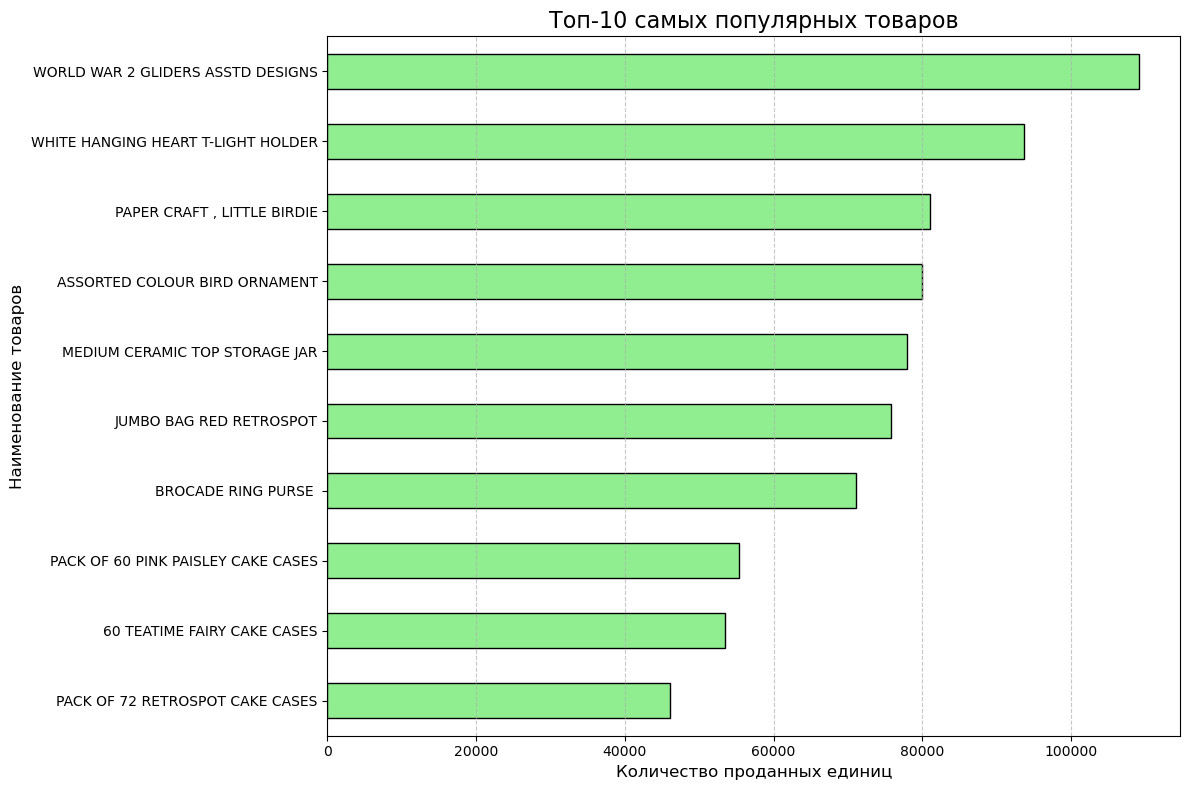

In [19]:
top_products = (
    df.groupby("Description")['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)  # Топ-10 товаров
)

# Построение горизонтальной столбчатой диаграммы
plt.figure(figsize=(12, 8))
top_products.sort_values().plot(kind='barh', color='lightgreen', edgecolor='black')

# Оформление графика
plt.title("Топ-10 самых популярных товаров", fontsize=16)
plt.xlabel("Количество проданных единиц", fontsize=12)
plt.ylabel("Наименование товаров", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()


### Вывод:
На графике представлены 10 самых популярных товаров, которые имеют наибольшее количество проданных единиц. Лидером продаж является товар **`WORLD WAR 2 GLIDERS ASSTD DESIGNS`**, за которым следуют **`WHITE HANGING HEART T-LIGHT HOLDER`** и **`PAPER CRAFT, LITTLE BIRDIE`**. Эти товары играют ключевую роль в формировании выручки и, вероятно, имеют стабильный спрос.

---

###  Добавление признака:
Чтобы учесть популярность товара в модели, можно добавить следующие признаки:
1. **Сколько раз за день приобрели топовый товар** (`Top10Quantity`).
---

### Использование в модели:
- **`Top10Quantity`** будет целочисленным признаком (в датасете sales_per_day).

In [20]:
# Определение топ-10 товаров
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index

# Фильтр строк с товарами из топ-10
df['IsTopProduct'] = df['Description'].isin(top_products).astype(int)

# Агрегация данных: подсчет количества товаров из топ-10 по дням
top10_daily_sales = df[df['IsTopProduct'] == 1].groupby(df['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
top10_daily_sales.rename(columns={'Quantity': 'Top10Quantity', 'InvoiceDate': 'Date'}, inplace=True)

# Объединение с sales_per_day
# Убедимся, что оба столбца имеют тип datetime
sales_per_day['Date'] = pd.to_datetime(sales_per_day['InvoiceDate'])
top10_daily_sales['Date'] = pd.to_datetime(top10_daily_sales['Date'])

# Объединение таблиц
sales_per_day = sales_per_day.merge(top10_daily_sales, on='Date', how='left')

# Заполнение пропусков, если нет данных о продажах из топ-10
sales_per_day['Top10Quantity'] = sales_per_day['Top10Quantity'].fillna(0)

### **3.2 Распределение товаров по диапазонам цен**
- **Описание:** Круговая диаграмма, отображающая доли товаров в различных ценовых диапазонах (`0-10`, `10-50`, и т.д.).  
- **Цель:** Понять, какие ценовые категории товаров наиболее популярны и как распределяется ассортимент.

---

In [21]:
price_bins = pd.cut(df['Price'], 
                    bins=[0, 10, 50, 100, 500, 1000, np.inf],
                    labels=['0-10', '10-50', '50-100', '100-500', '500-1000', '1000+'])
price_distribution = price_bins.value_counts()

fig = px.pie(values=price_distribution, names=price_distribution.index, title='Доли диапазонов цен')
fig.show()


### **Вывод:**
Анализ показал, что подавляющее большинство товаров (97.1%) относится к ценовому диапазону **`0-10`**, что отражает ориентацию компании на доступные товары, привлекающие массового покупателя. Другие диапазоны, такие как **`10-50`** и выше, занимают незначительную долю, что указывает на ограниченное влияние более дорогих товаров на общую выручку.

---

### **Добавление признаков:**
Для учёта ценовых категорий в прогнозировании дневной выручки, в `sales_per_day` добавлены следующие признаки:
1. **Доля продаж товаров в каждом ценовом диапазоне:**  
   - `LowPriceShare` — доля продаж товаров в диапазоне **`0-10`**.
   - `MidPriceShare` — доля продаж товаров в диапазоне **`10-50`**.  
   Эти признаки помогут учесть вклад разных ценовых сегментов в формирование выручки.

2. **Количество продаж в каждом диапазоне:**  
   - `LowPriceCount` — общее количество товаров, проданных в диапазоне **`0-10`** за день.
   - `MidPriceCount` — количество товаров, проданных в диапазоне **`10-50`** за день.  

---

### **Использование в модели:**
Добавленные признаки позволяют модели учитывать вклад каждого ценового сегмента:
- **`LowPriceShare`**: Отражает долю дешёвых товаров, которые составляют основной объём продаж.
- **`MidPriceShare`**: Указывает на дополнительный вклад более дорогих товаров.
- **`LowPriceCount`** и **`MidPriceCount`**: Позволяют модели учитывать не только долю, но и абсолютное количество проданных единиц в разных сегментах.
---

In [22]:
# Преобразуем InvoiceDate в datetime в исходном DataFrame
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Определение ценовых диапазонов
df['PriceRange'] = pd.cut(
    df['Price'], 
    bins=[0, 10, 50, 100, 500, 1000, float('inf')], 
    labels=['0-10', '10-50', '50-100', '100-500', '500-1000', '1000+']
)

# Подсчёт долей продаж в каждом ценовом диапазоне
price_range_share = df.groupby([df['InvoiceDate'].dt.date, 'PriceRange'])['Quantity'].sum().unstack().fillna(0)

# Рассчёт только необходимых долей
price_range_share = price_range_share[['0-10', '10-50']].div(price_range_share.sum(axis=1), axis=0).reset_index()
price_range_share.rename(columns={'InvoiceDate': 'Date',
                                  '0-10': 'LowPriceShare',
                                  '10-50': 'MidPriceShare'}, inplace=True)

price_range_share['Date'] = pd.to_datetime(price_range_share['Date'])  # Приведение типов

# Приведение sales_per_day['Date'] к datetime
sales_per_day['Date'] = pd.to_datetime(sales_per_day['Date'])

# Объединение с sales_per_day (добавляем только LowPriceShare и MidPriceShare)
sales_per_day = sales_per_day.merge(price_range_share[['Date', 'LowPriceShare', 'MidPriceShare']],
                                    on='Date',
                                    how='left')

# Подсчёт количества товаров в каждом диапазоне
price_range_count = df.groupby([df['InvoiceDate'].dt.date,
                                'PriceRange'])['Quantity'].count().unstack().fillna(0)

price_range_count = price_range_count[['0-10', '10-50']].reset_index()  # Оставляем только нужные колонки

price_range_count.rename(columns={'InvoiceDate': 'Date', '0-10': 'LowPriceCount',
                                  '10-50': 'MidPriceCount'}, inplace=True)

price_range_count['Date'] = pd.to_datetime(price_range_count['Date'])  # Приведение типов

# Обновляем sales_per_day (добавляем только LowPriceCount и MidPriceCount)
sales_per_day = sales_per_day.merge(price_range_count[['Date', 'LowPriceCount', 'MidPriceCount']],
                                    on='Date',
                                    how='left')


### **3.3 Средние продажи по месяцам**
- **Описание:** Линейный график, отображающий средние продажи (`TotalPrice`) по месяцам.  
- **Цель:** Выявить сезонные тренды, пики и падения продаж, чтобы лучше понять их временную динамику.

---

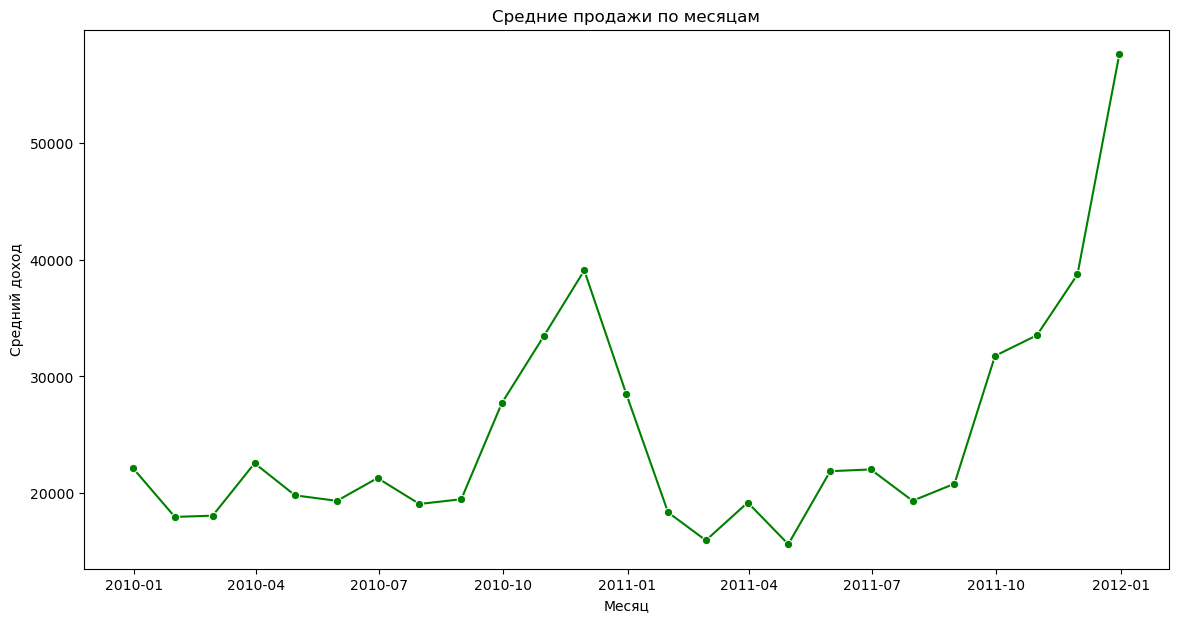

In [23]:
sales_per_month = sales_per_day.resample('M', on='InvoiceDate')['TotalPrice'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_per_month, x='InvoiceDate', y='TotalPrice', marker='o', color='green')
plt.title('Средние продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний доход')
plt.show()

### **Вывод:**
График показывает средние продажи по месяцам. Видно, что:
1. Наибольшие пики продаж приходятся на декабрь, что связано с праздничным сезоном.
2. После декабря наблюдается резкий спад (январь и февраль), характерный для постпраздничного периода.
3. Продажи начинают постепенно расти в осенние месяцы (октябрь — ноябрь), что указывает на подготовку к праздничному сезону.

---

### **Добавление признаков:**
Для учёта сезонности в модели были добавлены следующие признаки в `sales_per_day`:
1. **`IsDecember`**: бинарный флаг, указывающий на декабрь как период повышенного спроса.
2. **`IsQ4`**: бинарный флаг, отражающий продажи в четвёртом квартале (октябрь — декабрь), когда наблюдается общее увеличение выручки.

---

### **Использование в модели:**
- **`IsDecember`**: выделяет декабрь как уникальный месяц с аномально высокими продажами.
- **`IsQ4`**: позволяет модели учесть общий рост продаж в четвёртом квартале, не ограничиваясь только декабрём.

In [24]:
# Убедимся, что Date имеет тип datetime
sales_per_day['Date'] = pd.to_datetime(sales_per_day['Date'])

# Добавление флага декабрьских продаж
sales_per_day['IsDecember'] = (sales_per_day['Month'] == 12).astype(int)

# Добавление флага четвёртого квартала
sales_per_day['IsQ4'] = sales_per_day['Month'].isin([10, 11, 12]).astype(int)

### **3.4 Продажи по странам**
- **Описание:** Круговая диаграмма, показывающая доли продаж для топ-10 стран по объему (`TotalPrice`).  
- **Цель:** Выявить ключевые рынки, где наблюдается наибольший объем продаж, и определить, какие страны играют стратегически важную роль.  

---

In [25]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
fig = px.pie(values=country_sales, names=country_sales.index, title='Продажи по странам')
fig.show()

### **Вывод:**
Анализ продаж по странам показывает, что основным рынком является **`United Kingdom`**, на который приходится 85.5% всех продаж. Это подтверждает доминирующую роль UK в общей выручке и подчёркивает важность её учёта в модели. Остальные страны, такие как **EIRE**, **Netherlands**, и **Germany**, вносят меньший вклад, но могут быть точками роста при правильной маркетинговой стратегии.

---

### **Добавление признаков:**
В `sales_per_day` добавлен бинарный флаг:
1. **`IsUK`**: указывает, что продажи в этот день были преимущественно из UK.  
Этот признак важен для учёта основного рынка компании, который формирует большую часть дохода.

---

### **Использование в модели:**
- **`IsUK`**: Позволяет модели учитывать доминирующее влияние UK на общую выручку. Это помогает при прогнозировании, особенно если структура продаж по странам меняется со временем.


In [26]:
# Убедимся, что Country и InvoiceDate корректно обработаны
df['Country'] = df['Country'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Подсчёт ежедневных продаж по странам
daily_country_sales = df.groupby([df['InvoiceDate'].dt.date, 'Country'])['TotalPrice'].sum().unstack().fillna(0)

# Приведение индекса к столбцу для объединения и преобразование типов
daily_country_sales = daily_country_sales.reset_index()
daily_country_sales.rename(columns={'InvoiceDate': 'Date'}, inplace=True)
daily_country_sales['Date'] = pd.to_datetime(daily_country_sales['Date'])

# Добавление признака IsUK
daily_country_sales['IsUK'] = (daily_country_sales['United Kingdom'] > 0).astype(int)

# Убедимся, что Date в sales_per_day имеет тип datetime
sales_per_day['Date'] = pd.to_datetime(sales_per_day['Date'])

# Объединение с sales_per_day
sales_per_day = sales_per_day.merge(daily_country_sales[['Date', 'IsUK']], on='Date', how='left')

# Заполнение пропусков (если в некоторых днях нет данных о продажах из UK)
sales_per_day['IsUK'] = sales_per_day['IsUK'].fillna(0).astype(int)


### **3.5 Распределение клиентов по количеству покупок с сегментацией**
- **Описание:** Точечный график с сегментацией клиентов на группы:  
  - `Низкая активность` (менее 5 покупок).  
  - `Средняя активность` (5–10 покупок).  
  - `Высокая активность` (более 10 покупок).  
- **Цель:** Проанализировать активность клиентов и выделить лояльных клиентов (для наглядности строим график для клиентов с количеством покупок до 100).

---

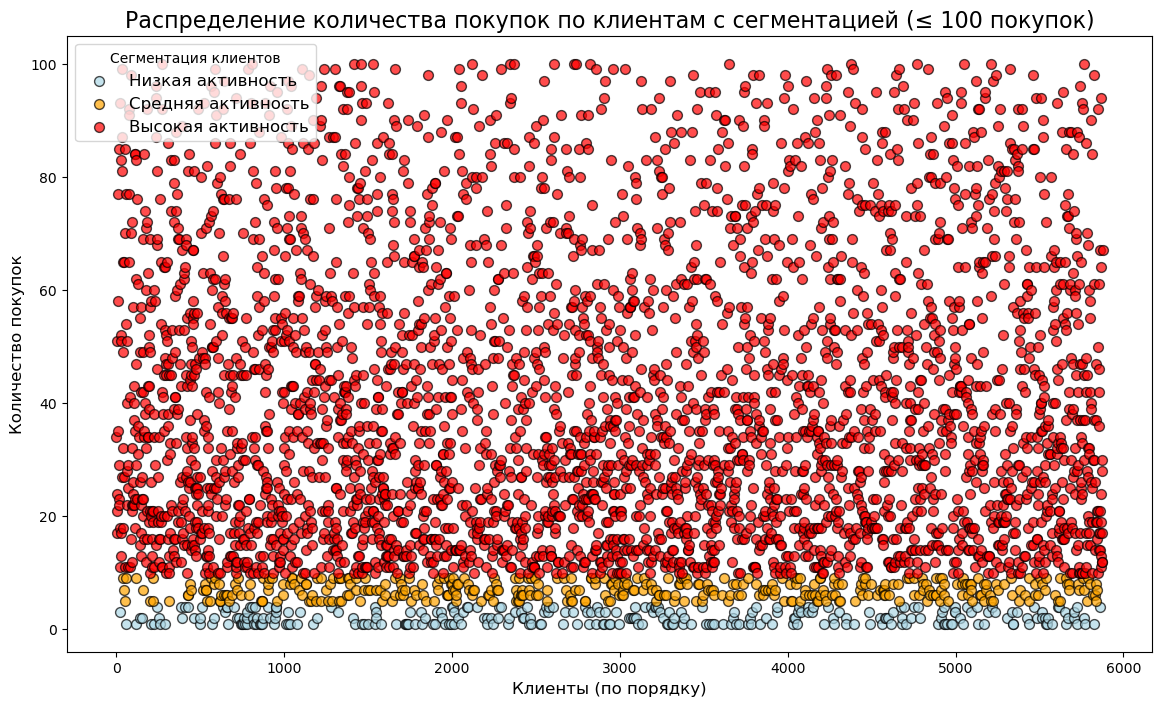

In [27]:
# Подготовка данных: подсчет количества покупок на клиента
customer_purchases = df.groupby('Customer ID')['Invoice'].count().reset_index()
customer_purchases.columns = ['Customer ID', 'PurchaseCount']

# Фильтрация клиентов с количеством покупок ≤ 100
customer_purchases = customer_purchases[customer_purchases['PurchaseCount'] <= 100]

# Сегментация клиентов
bins = [0, 5, 10, float('inf')]
labels = ['Низкая активность', 'Средняя активность', 'Высокая активность']
customer_purchases['Segment'] = pd.cut(customer_purchases['PurchaseCount'],
                                       bins=bins,
                                       labels=labels,
                                       right=False)

# Создание X-координат для каждого сегмента
segments = {'Низкая активность': [], 'Средняя активность': [], 'Высокая активность': []}
for idx, row in customer_purchases.iterrows():
    segments[row['Segment']].append(idx)

# Построение улучшенного графика
plt.figure(figsize=(14, 8))
colors = {'Низкая активность': 'lightblue', 'Средняя активность': 'orange', 'Высокая активность': 'red'}

for segment, color in colors.items():
    subset = customer_purchases[customer_purchases['Segment'] == segment]
    plt.scatter(
        segments[segment], subset['PurchaseCount'], label=segment,
        color=color, alpha=0.7, edgecolor='black', s=50
    )

# Настройка графика
plt.title('Распределение количества покупок по клиентам с сегментацией (≤ 100 покупок)', fontsize=16)
plt.xlabel('Клиенты (по порядку)', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.legend(title='Сегментация клиентов', fontsize=12)

plt.show()

### **Вывод:**
На графике видно, что основная часть клиентов относится к категории **высокой активности** (более 10 покупок), и они формируют большую часть выручки компании.  
Клиенты с **средней активностью** (5–10 покупок) и **низкой активностью** (менее 5 покупок) оказывают меньший вклад, но могут быть перспективной целевой группой для увеличения продаж через маркетинговые усилия.

---

### **Добавление признаков:**
Для учёта клиентской активности в прогнозировании общей выручки в `sales_per_day` добавлены следующие признаки:
1. **`Activity_High`**: Доля выручки от клиентов с высокой активностью.
2. **`Activity_Medium`**: Доля выручки от клиентов со средней активностью.
3. **`Activity_Low`**: Доля выручки от клиентов с низкой активностью.

---

### **Использование в модели:**
- **`Activity_High`**: Этот признак ключевой, так как клиенты с высокой активностью формируют основную часть выручки.
- **`Activity_Medium`** и **`Activity_Low`**: Могут быть полезны для учёта влияния менее активных клиентов.

In [28]:
# Убедимся, что InvoiceDate и Customer ID корректно обработаны
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Подсчёт активности клиентов
customer_activity = df.groupby('Customer ID')['Invoice'].count().reset_index()
customer_activity.columns = ['Customer ID', 'PurchaseCount']

# Сегментация клиентов по активности
bins = [0, 5, 10, float('inf')]
labels = ['Low', 'Medium', 'High']
customer_activity['ActivitySegment'] = pd.cut(customer_activity['PurchaseCount'], bins=bins, labels=labels,
                                              right=False)

# Присоединение активности клиентов к исходным данным
df = df.merge(customer_activity[['Customer ID', 'ActivitySegment']], on='Customer ID', how='left')

# Подсчёт выручки по сегментам активности на уровне дня
activity_revenue = (
    df.groupby(
        [df['InvoiceDate'].dt.date, 'ActivitySegment']
    )['TotalPrice']
    .sum()
    .unstack()
    .fillna(0)
)
activity_revenue = activity_revenue.reset_index()
activity_revenue.rename(columns={'InvoiceDate': 'Date',
                                 'Low': 'Activity_Low',
                                 'Medium': 'Activity_Medium',
                                 'High': 'Activity_High'}, inplace=True)

# Приведение столбца Date к datetime
activity_revenue['Date'] = pd.to_datetime(activity_revenue['Date'])
sales_per_day['Date'] = pd.to_datetime(sales_per_day['Date'])

# Объединение с sales_per_day
sales_per_day = sales_per_day.merge(activity_revenue, on='Date', how='left')

# Заполнение пропусков (если в некоторые дни нет данных по сегментам активности)
sales_per_day[['Activity_Low', 'Activity_Medium', 'Activity_High']] = sales_per_day[['Activity_Low',
                                                                                     'Activity_Medium',
                                                                                     'Activity_High']].fillna(0)


### **3.6 Объем продаж по дням недели**
- **Описание:** Столбчатая диаграмма, показывающая, как распределяются продажи по дням недели (`Понедельник` — `Воскресенье`).  
- **Цель:** Выявить, в какие дни недели наблюдается наибольший объем продаж, чтобы оптимизировать операции и маркетинговые активности.


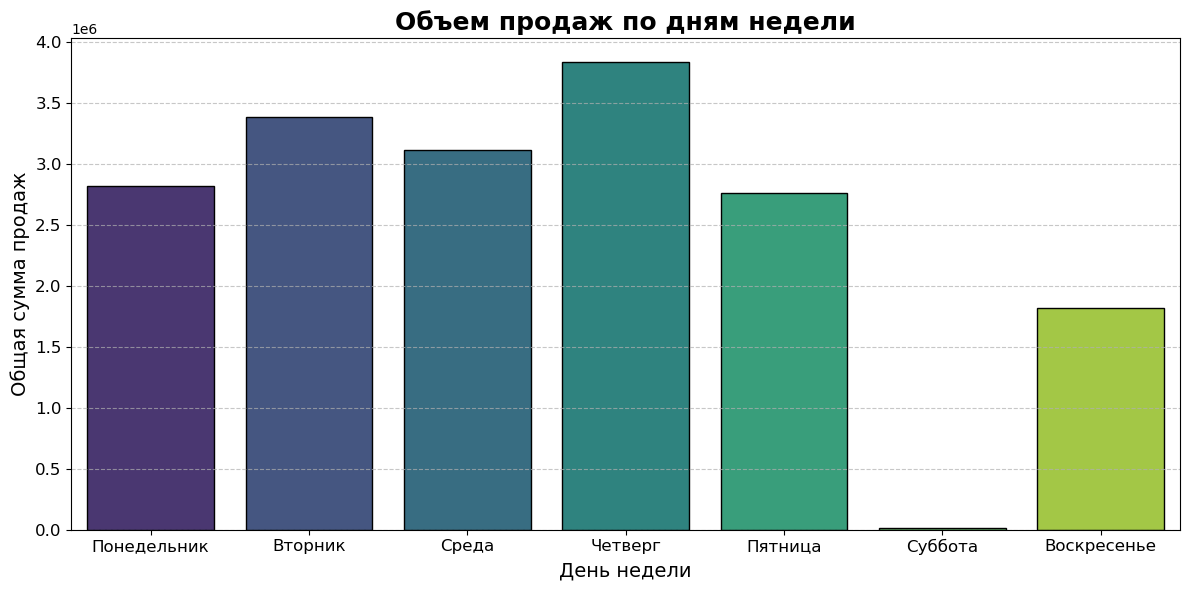

In [29]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # 0 = Понедельник, 6 = Воскресенье

# Агрегация данных по дням недели
sales_by_day = df.groupby('DayOfWeek')['TotalPrice'].sum().reset_index()

# Добавление названий дней недели
day_labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
sales_by_day['DayOfWeek'] = sales_by_day['DayOfWeek'].apply(lambda x: day_labels[x])

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='TotalPrice', data=sales_by_day, palette='viridis', edgecolor='black')

# Оформление графика
plt.title('Объем продаж по дням недели', fontsize=18, fontweight='bold')
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Общая сумма продаж', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показ графика
plt.tight_layout()
plt.show()

### **Вывод:**
График демонстрирует объем продаж по дням недели. Основные выводы:
1. **Пик продаж приходится на четверг**, что свидетельствует о повышенной активности клиентов в этот день.
2. **Суббота практически лишена продаж**, что связано с закрытием магазина или минимальными онлайн-продажами в этот день.
3. Продажи в остальные дни недели остаются относительно стабильными, что важно для учёта сезонных колебаний.

---

### **Добавление признаков:**
Для учёта влияния дня недели в прогнозировании общей выручки в `sales_per_day` добавлены:
1. **`DayOfWeek`**: числовое обозначение дня недели (0 — понедельник, 6 — воскресенье).
2. **`IsSaturday`**: бинарный флаг, указывающий на субботу, когда продажи почти всегда отсутствуют.
3. **`IsWeekend`**: бинарный флаг, показывающий, относится ли день к выходным (суббота или воскресенье).

---

### **Использование в модели:**
- **`DayOfWeek`**: позволяет модели учитывать различия в продажах по дням недели.
- **`IsSaturday`**: помогает модели распознавать дни, когда выручка минимальна.
- **`IsWeekend`**: улучшает интерпретацию, выделяя дни с возможными сезонными изменениями в активности.


In [30]:
# Убедимся, что Date имеет тип datetime
sales_per_day['Date'] = pd.to_datetime(sales_per_day['Date'])

# Добавление признаков дня недели и выходных
sales_per_day['DayOfWeek'] = sales_per_day['Date'].dt.dayofweek  # 0 = Понедельник, 6 = Воскресенье
sales_per_day['IsSaturday'] = (sales_per_day['DayOfWeek'] == 5).astype(int)  # Флаг субботы
sales_per_day['IsWeekend'] = sales_per_day['DayOfWeek'].isin([5, 6]).astype(int)  # Флаг выходных

# **4. Прогнозирование выручки компании**

В данном разделе мы решаем задачу прогнозирования ежедневной выручки компании. Для этого были построены три модели машинного обучения, каждая из которых оценивалась по метрикам качества, а результаты представлены в виде визуализации.

---

### Логарифмическое преобразование целевой переменной
Уменьшает влияние аномально высоких значений (выбросов), делая данные более стабильными для анализа и обучения модели.

Преобразование `TotalPrice`:

In [31]:
sales_per_day['LogTotalPrice'] = np.log1p(sales_per_day['TotalPrice'])

## **Построение модели**

### **Целевая переменная и признаки**

- **Целевая переменная:**  
  `TotalPrice` — общая выручка компании за день.

- **Признаки для модели:**  
  Мы используем следующие ключевые признаки, чтобы учесть как временные, так и поведенческие факторы:
  - `DayOfWeek`: день недели.
  - `IsSaturday`: флаг субботы (когда продажи практически отсутствуют).
  - `IsDecember`: флаг декабрьских продаж.
  - `IsQ4`: флаг четвёртого квартала (сезонность).
  - `IsUK`: флаг, указывающий на основной рынок (Великобритания).
  - `Activity_Low`, `Activity_Medium`, `Activity_High`: активность клиентов по сегментам.
  - `LowPriceShare`, `MidPriceShare`: доли продаж в разных ценовых сегментах.
  - `LowPriceCount`, `MidPriceCount`: количество товаров, проданных в разных ценовых диапазонах.

Данные разделены на тренировочную (80%) и тестовую (20%) выборки для обучения и проверки моделей.

---


In [32]:
# Обучим модель без 10 последних дней, чтобы позже на них с помощью лучшей модели предсказать выручку
# и сравнить с фактическими значениями.

sales_per_day = sales_per_day.iloc[:-10]

# Целевая переменная
y = sales_per_day['TotalPrice']

# Признаки для модели
features = [
    'DayOfWeek', 'IsSaturday', 'IsDecember', 'IsQ4', 'IsUK',
    'Activity_Low', 'Activity_Medium', 'Activity_High',
    'LowPriceShare', 'MidPriceShare', 'LowPriceCount', 'MidPriceCount'
]
X = sales_per_day[features]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

 ## **Обучение моделей**

Мы обучили следующие модели для прогнозирования выручки:
1. **Линейная регрессия (Linear Regression):**
   - Простая модель, подходящая для линейных зависимостей.
2. **Случайный лес (Random Forest):**
   - Мощная модель, способная учитывать сложные зависимости, но чувствительная к шуму.
3. **Градиентный бустинг (Gradient Boosting):**
   - Сложная модель, часто показывающая наилучшие результаты за счёт учёта нелинейностей.

---

In [47]:
# --- Обучение моделей ---

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

# Случайный лес
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Градиентный бустинг
gb = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# --- Оценка моделей ---
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"{model_name}: MAE = {mae:.2f}, RMSE = {rmse:.2f}")
    return mae, rmse

lin_reg_mae, lin_reg_rmse = evaluate_model(y_test, lin_reg_pred, "Linear Regression")
rf_mae, rf_rmse = evaluate_model(y_test, rf_pred, "Random Forest")
gb_mae, gb_rmse = evaluate_model(y_test, gb_pred, "Gradient Boosting")

# --- Визуализация ---
def plot_results(y_true, y_pred, model_name, color):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=np.arange(len(y_true)),
        y=y_true.values,
        mode='lines+markers',
        name='Фактические значения',
        line=dict(color='blue'),
        marker=dict(color='blue', size=6)
    ))
    fig.add_trace(go.Scatter(
        x=np.arange(len(y_pred)),
        y=y_pred,
        mode='lines+markers',
        name=f'{model_name}',
        line=dict(color=color),
        marker=dict(color=color, size=6)
    ))
    fig.update_layout(
        title=f"{model_name}: Сравнение фактических и прогнозируемых значений",
        xaxis_title="Индекс",
        yaxis_title="Ежедневная выручка",
        legend_title="Легенда",
        template="plotly_white"
    )
    fig.show()

Linear Regression: MAE = 624.18, RMSE = 895.15
Random Forest: MAE = 422.01, RMSE = 1475.23
Gradient Boosting: MAE = 314.73, RMSE = 837.22


## **Результаты оценки моделей**

Модели были оценены по следующим метрикам:
- **MAE (Mean Absolute Error):** Средняя абсолютная ошибка.
- **RMSE (Root Mean Squared Error):** Корень средней квадратичной ошибки.

Результаты:

| Модель                | MAE     | RMSE     |
|-----------------------|---------|----------|
| **Linear Regression** | 624.18  | 895.15   |
| **Random Forest**     | 422.01  | 1475.23  |
| **Gradient Boosting** | 314.73  | 837.22   |

### **Выводы:**
- **Линейная регрессия** показывает худшие метрики, что связано с простотой и линейностью данной моедели - она плохо подходит для сложных данных.  
- **Случайный лес** демонстрирует хорошие результаты, но его RMSE выше, чем у градиентного бустинга, что указывает на менее точное предсказание.  
- **Градиентный бустинг** показывает наилучший баланс между MAE и RMSE, что делает его предпочтительным для использования.

---

## **Визуализация результатов**

### **Linear Regression**
График ниже показывает сравнение фактических и прогнозируемых значений для линейной регрессии:



In [48]:
plot_results(y_test, lin_reg_pred, "Linear Regression", 'orange')

### **Random Forest**
График ниже демонстрирует работу модели случайного леса:

---

In [49]:
plot_results(y_test, rf_pred, "Random Forest", 'green')

### **Gradient Boosting**
Градиентный бустинг демонстрирует наилучшее соответствие между фактическими и прогнозируемыми значениями:

---

In [50]:
plot_results(y_test, gb_pred, "Gradient Boosting", 'red')

## **5. Прогноз на будущие периоды**

В этом разделе мы берем актуальные данные за последние 10 дней (до этого мы специально обучали модель без них).
И сравниваем предсказанные моделью результаты с фактическими.

In [51]:
# Выбираем последние 10 значений
last_10_data = sales_per_day.iloc[-10:]

# Разделяем на признаки (X) и реальные значения (y_true)
X_last_10 = last_10_data[[
    'DayOfWeek', 'IsSaturday', 'IsDecember', 'IsQ4', 'IsUK',
    'Activity_Low', 'Activity_Medium', 'Activity_High',
    'LowPriceShare', 'MidPriceShare', 'LowPriceCount', 'MidPriceCount'
]
] # Признаки

X_last_10 = X_last_10.fillna(0)
y_true_last_10 = last_10_data['TotalPrice']  # Реальные значения

# Прогнозируем значения TotalPrice для последних 10 дней
y_pred_last_10 = gb.predict(X_last_10)

# Формируем итоговый DataFrame для сравнения
comparison = pd.DataFrame({
    'Actual_TotalPrice': y_true_last_10.values,
    'Predicted_TotalPrice': y_pred_last_10
})

# Выводим результат
comparison

Actual_TotalPrice  Predicted_TotalPrice
0           30190.92          29919.144493
1           45333.13          45018.021208
2           49664.89          49574.915686
3           71979.93          71944.128574
4           38579.11          38605.722140
5           26674.66          26533.057832
6               0.00             16.662308
7           17300.96          17095.384775
8           51831.67          51710.569823
9           48851.68          48690.412060

### Вывод:

Модель градиентного бустинга успешно предсказала выручку на ближайшие 10 дней. Результаты показали высокую точность, что подтверждается минимальным расхождением между фактическими (`Actual_TotalPrice`) и предсказанными (`Predicted_TotalPrice`) значениями для большинства дней. Данное решение можно эффективно использовать для краткосрочного планирования и управления выручкой.

## **Заключение**

1. Проведено прогнозирование выручки компании на основе временных и поведенческих факторов.
2. Использованы три модели: линейная регрессия, случайный лес и градиентный бустинг.
3. Наилучшие результаты показала модель **градиентного бустинга** с метриками:
   - **MAE:** 314.73
   - **RMSE:** 837.22
4. Результаты визуализированы для каждой модели, что позволяет наглядно оценить их точность.
5. Модель успешно предсказала будущую выручку компании с высокой точностью, что подтверждают близкие значения предсказанных и фактических данных.
6. Использованная модель может быть применена для дальнейшего прогнозирования продаж в онлайн-ритейле.